# Actividad práctica 

### Instrucciones
- Escriba las rutinas de Python necesarias para resolver los problemas de cada punto
- Siga las instrucciones y conteste donde se pida
- Entregue el notebook con sus respuestas al correo: phuijse@inf.uach.cl
- El trabajo es individual

### Introducción
En esta actividad usaremos la base de datos [*Auto Milles per Gallon Data Set*](https://archive.ics.uci.edu/ml/datasets/auto+mpg) del repositorio UCI

Puede descargarla usando el siguiente bloque

In [1]:
%%bash
wget -O auto.csv -c https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original 
wget -O README -c https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names 

--2019-05-09 23:12:24--  https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original
Cargado certificado CA '/etc/ssl/certs/ca-certificates.crt'
Resolviendo archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Conectando con archive.ics.uci.edu (archive.ics.uci.edu)[128.195.10.252]:443... conectado.
Petición HTTP enviada, esperando respuesta... 416 Requested Range Not Satisfiable

    El fichero ya ha sido totalmente recuperado, no hay nada que hacer.

--2019-05-09 23:12:25--  https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names
Cargado certificado CA '/etc/ssl/certs/ca-certificates.crt'
Resolviendo archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Conectando con archive.ics.uci.edu (archive.ics.uci.edu)[128.195.10.252]:443... conectado.
Petición HTTP enviada, esperando respuesta... 416 Requested Range Not Satisfiable

    El fichero ya ha sido totalmente recuperado, no hay nada que hacer.



### Información preliminar

1. Use las herramientas de UNIX para leer el archivo README en el notebook
1. Responda ¿Cuántos y cuáles son los atributos (características)? ¿De qué tipo es cada uno?
        1. mpg:           continuous
        2. cylinders:     multi-valued discrete
        3. displacement:  continuous
        4. horsepower:    continuous
        5. weight:        continuous
        6. acceleration:  continuous
        7. model year:    multi-valued discrete
        8. origin:        multi-valued discrete
        9. car name:      string (unique for each instance)
1. Responda ¿Cuantas instancias/ejemplos existen?
        406


In [2]:
!cat README

1. Title: Auto-Mpg Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University. The dataset was 
                used in the 1983 American Statistical Association Exposition.
   (c) Date: July 7, 1993

3. Past Usage:
    -  See 2b (above)
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   This dataset is a slightly modified version of the dataset provided in
   the StatLib library.  In line with the use by Ross Quinlan (1993) in
   predicting the attribute "mpg", 8 of the original instances were removed 
   because they had unknown values for the "mpg" attribute.  The original 
   dataset is available in the file "auto-mpg.data-original".

   "The data concerns city-cycle fuel consumptio

### Lectura de datos

1. Cree un `DataFrame` a partir de `auto.csv` 
    1. Use una columna por atributo* 
    1. Use los nombres de columna descritos en `README` 
1. Imprima las primeras 5 filas del dataframe

**HINT:** Verifique el uso  del argumento `delim_whitespace`*

In [3]:
import pandas as pd
from IPython.display import display
names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
df = pd.read_csv("auto.csv", names=names, delim_whitespace=True)
!head -5 "auto.csv"
display(df.head())
df.info()

18.0   8.   307.0      130.0      3504.      12.0   70.  1.	"chevrolet chevelle malibu"
15.0   8.   350.0      165.0      3693.      11.5   70.  1.	"buick skylark 320"
18.0   8.   318.0      150.0      3436.      11.0   70.  1.	"plymouth satellite"
16.0   8.   304.0      150.0      3433.      12.0   70.  1.	"amc rebel sst"
17.0   8.   302.0      140.0      3449.      10.5   70.  1.	"ford torino"


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       406 non-null float64
displacement    406 non-null float64
horsepower      400 non-null float64
weight          406 non-null float64
acceleration    406 non-null float64
model_year      406 non-null float64
origin          406 non-null float64
car_name        406 non-null object
dtypes: float64(8), object(1)
memory usage: 28.6+ KB


### Manipulación de columnas 

1. Convierta las columnas *cylinders*, *year* y *origin* a valores enteros
1. Reemplace los valores $[1, 2, 3]$ de *origin* por *USA*, *Europe*, *Japan*, respectivamente
1. Convierta los valores de la columna *mpg* (galones por milla) a kmpl (kilómetros por litro)
1. Convierta los valores de la columna peso de libras (*pounds*) a kilogramos
1. Modifique el nombre de la columna *mpg* a kmpl


In [4]:
# 1. Convierta las columnas cylinders, year y origin a valores enteros

df['cylinders'] = df['cylinders'].astype(int)
df['model_year'] = df['model_year'].astype(int)
df['origin'] = df['origin'].astype(int)

# 2. Reemplace los valores [1,2,3] de origin por USA, Europe, Japan, respectivamente

df['origin'] = df['origin'].map({1: 'USA', 2: 'Europe', 3:'Japan'})
#df['origin'] = df['origin'].map({1.0: 'USA', 2.0: 'Europe', 3.0:'Japan'})
#df['kmpl'] = df['mpg']*0.425144

# 3. Convierta los valores de la columna mpg (galones por milla) a kmpl (kilómetros por litro)

df['mpg'] = df['mpg']*0.425144

# 4. Convierta los valores de la columna peso de libras (pounds) a kilogramos

df['weight'] = df['weight']*0.453592

# 5. Modifique el nombre de la columna mpg a kmpl

df.rename(columns={'mpg': 'kmpl'}, inplace=True)
df.head()

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,7.652592,8,307.0,130.0,1589.386368,12.0,70,USA,chevrolet chevelle malibu
1,6.377160,8,350.0,165.0,1675.115256,11.5,70,USA,buick skylark 320
2,7.652592,8,318.0,150.0,1558.542112,11.0,70,USA,plymouth satellite
3,6.802304,8,304.0,150.0,1557.181336,12.0,70,USA,amc rebel sst
4,7.227448,8,302.0,140.0,1564.438808,10.5,70,USA,ford torino


### Datos perdidos

1. Encuentre los nombres de los autos que tengan valores perdidos (*missing data*)
1. Encuentre los nombres de los atributos que tengan valores perdidos
1. Elimines las filas con atributos perdidos ¿Cuántas filas quedan en el dataframe?

In [5]:
# 1. Encuentre los nombres de los autos que tengan valores perdidos (missing data)

nanrows = df.loc[pd.isnull(df).any(axis=1)]

# 2. Encuentre los nombres de los atributos que tengan valores perdidos

nancols = df.columns[df.isna().any()]

# 3. Elimines las filas con atributos perdidos ¿Cuántas filas quedan en el dataframe?

df.dropna(inplace=True)
display(nanrows["car_name"], nancols)
df.info()

10                 citroen ds-21 pallas
11     chevrolet chevelle concours (sw)
12                     ford torino (sw)
13              plymouth satellite (sw)
14                   amc rebel sst (sw)
17                ford mustang boss 302
38                           ford pinto
39          volkswagen super beetle 117
133                       ford maverick
337                renault lecar deluxe
343                  ford mustang cobra
361                         renault 18i
367                           saab 900s
382                      amc concord dl
Name: car_name, dtype: object

Index(['kmpl', 'horsepower'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 405
Data columns (total 9 columns):
kmpl            392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
model_year      392 non-null int64
origin          392 non-null object
car_name        392 non-null object
dtypes: float64(5), int64(2), object(2)
memory usage: 30.6+ KB


### Multi-índice

1. Cree un dataframe con dos columnas a partir del atributo "*car name*"
    1. La primera columna debe tener la primera palabra del string en *car name**
    1. La segunda columna debe tener el resto del string en *car name*
1. Elimine la columna *car name* del dataframe y agregue estas nuevas columnas llamándolas *brand* y *model*, respectivamente
1. ¿Cuántas marcas (*brand*) únicas existan? ¿Existen columnas repetidas o mal escritas? Mencione cuales y corrijalas**
1. Cree un multi-índice que utilice como primera llave a *brand* y como segunda a *model*
1. Muestre los autos con marca *Mazda*
1. Usando groupby cuente la cantidad de modelos por marca

**HINT:** Verifique el uso de `.str.split()`* y `str.replace()`**

In [6]:
# 1. Cree un dataframe con dos columnas a partir del atributo "car name"

# funcion que splotea car_name en brand y model
def meh(x):
    return x.split(" ",1)
# serie con brand y model
serie = df.car_name.apply(meh)
# dataframe con brand y model
ndf = pd.DataFrame(serie.tolist(), columns=['brand', 'model'])

# 2. Elimine la columna car name del dataframe y agregue estas nuevas columnas llamándolas brand y model, respectivamente

df.drop(columns="car_name", inplace=True)
df = pd.concat([df.reset_index(), ndf], axis=1).drop(columns="index")

In [7]:
# 3. ¿Cuántas marcas (brand) únicas existan? ¿Existen columnas repetidas o mal escritas? Mencione cuales y corrijalas**
#    clases unicas 31
#    columnas repetidas o mal escritas ['chevroelt','maxda','toyouta','vokswagen','wv','mercedes']

brands = sorted(df['brand'].unique().tolist())
print('Marcas sin filtrar')
display(brands, len(brands))

df.replace({'brand': 'chevroelt'}, 'chevrolet', inplace=True)
df.replace({'brand': 'maxda'}, 'mazda', inplace=True)
df.replace({'brand': 'toyouta'}, 'toyota', inplace=True)
df.replace({'brand': 'vokswagen'}, 'volkswagen', inplace=True)
df.replace({'brand': 'vw'}, 'volkswagen', inplace=True)
df.replace({'brand': 'mercedes'}, 'mercedes-benz', inplace=True)
print('__________________________\n')
print('Marcas filtradas')
brands = sorted(df['brand'].unique().tolist())
display(brands, len(brands))

Marcas sin filtrar


['amc',
 'audi',
 'bmw',
 'buick',
 'cadillac',
 'capri',
 'chevroelt',
 'chevrolet',
 'chevy',
 'chrysler',
 'datsun',
 'dodge',
 'fiat',
 'ford',
 'hi',
 'honda',
 'maxda',
 'mazda',
 'mercedes',
 'mercedes-benz',
 'mercury',
 'nissan',
 'oldsmobile',
 'opel',
 'peugeot',
 'plymouth',
 'pontiac',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'toyouta',
 'triumph',
 'vokswagen',
 'volkswagen',
 'volvo',
 'vw']

37

__________________________

Marcas filtradas


['amc',
 'audi',
 'bmw',
 'buick',
 'cadillac',
 'capri',
 'chevrolet',
 'chevy',
 'chrysler',
 'datsun',
 'dodge',
 'fiat',
 'ford',
 'hi',
 'honda',
 'mazda',
 'mercedes-benz',
 'mercury',
 'nissan',
 'oldsmobile',
 'opel',
 'peugeot',
 'plymouth',
 'pontiac',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'triumph',
 'volkswagen',
 'volvo']

31

In [8]:
# 4. Cree un multi-índice que utilice como primera llave a brand y como segunda a model

df.set_index(['brand', 'model'],inplace=True)
df.sort_index(inplace=True)

In [9]:
# 5. Muestre los autos con marca Mazda

idx = pd.IndexSlice
mazda = df.loc[idx["mazda"]]
display(mazda)

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
626,13.307007,4,120.0,75.0,1153.030864,17.5,80,Japan
626,13.434550,4,120.0,74.0,1195.214920,18.3,81,Japan
glc,19.811710,4,86.0,65.0,957.079120,17.9,80,Japan
glc 4,14.497410,4,91.0,68.0,900.380120,16.0,81,Japan
glc custom,13.179464,4,91.0,68.0,893.576240,17.6,82,Japan
glc custom l,15.730328,4,91.0,68.0,918.523800,18.2,82,Japan
glc deluxe,13.944723,4,78.0,52.0,900.380120,19.4,78,Japan
glc deluxe,14.497410,4,86.0,65.0,895.844200,15.2,79,Japan
rx-4,9.140596,3,80.0,110.0,1233.770240,13.5,77,Japan


In [10]:
# 6. Usando groupby cuente la cantidad de modelos por marca
display(df.groupby('brand').size())


brand
amc              27
audi              7
bmw               2
buick            17
cadillac          2
capri             1
chevrolet        44
chevy             3
chrysler          6
datsun           23
dodge            28
fiat              8
ford             48
hi                1
honda            13
mazda            12
mercedes-benz     3
mercury          11
nissan            1
oldsmobile       10
opel              4
peugeot           8
plymouth         31
pontiac          16
renault           3
saab              4
subaru            4
toyota           26
triumph           1
volkswagen       22
volvo             6
dtype: int64

### Buscando autos

1. Por cada marca encuentre el auto más antiguo y el más nuevo
1. Por cada marca encuentre el auto más pesado y el más liviano
1. Por cada marca encuentre los autos con mayor y menor caballos de fuerza, respectivamente
1. Por cada marca encuentre los autos con menor y mayor desempeño en términos de kmpl, respectivamente

In [12]:
# 1. 2. 3. 4.
#df.ix[df[''].idxmax()]
brands = df.index.get_level_values('brand').unique()

for brand in  brands:
    tdf = df.loc[idx[brand]]
    #TODO utilizar indice numerico para seleccionar rows
    #     #hourse typo
    max_year = tdf['model_year'].max()
    max_weight = tdf['weight'].max()
    max_horsepower = tdf['horsepower'].max()
    max_kmpl = tdf['kmpl'].max()
    
    min_year = tdf['model_year'].min()
    min_weight = tdf['weight'].min()
    min_horsepower = tdf['horsepower'].min()
    min_kmpl = tdf['kmpl'].min()
    display(
        brand,
        "Nuevo",
        tdf[tdf['model_year']==max_year],
        "Antiguo",
        tdf[tdf['model_year']==min_year],
        "Pesado",
        tdf[tdf['weight']==max_weight],
        "Liviano",
        tdf[tdf['weight']==min_weight],
        "Max horse power",
        tdf[tdf['horsepower']==max_horsepower],
        "Min horse power",
        tdf[tdf['horsepower']==min_horsepower],
        "Max kmpl",
        tdf[tdf['kmpl']==max_kmpl],
        "Min kmpl",
        tdf[tdf['kmpl']==min_kmpl],
    )

'amc'

'Nuevo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
concord,10.330999,4,151.0,90.0,1362.136776,20.1,80,USA


'Antiguo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
ambassador dpl,6.377160,8,390.0,190.0,1746.329200,8.5,70,USA
gremlin,8.928024,6,199.0,90.0,1201.111616,15.0,70,USA
hornet,7.652592,6,199.0,97.0,1258.264208,15.5,70,USA
rebel sst,6.802304,8,304.0,150.0,1557.181336,12.0,70,USA


'Pesado'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
matador (sw),5.952016,8,304.0,150.0,1930.941144,15.5,74,USA


'Liviano'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
gremlin,8.077736,6,232.0,100.0,1194.761328,13.0,71,USA


'Max horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
ambassador dpl,6.37716,8,390.0,190.0,1746.3292,8.5,70,USA


'Min horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
spirit dl,11.648946,4,121.0,80.0,1211.09064,15.0,79,USA


'Max kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
spirit dl,11.648946,4,121.0,80.0,1211.09064,15.0,79,USA


'Min kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
ambassador brougham,5.526872,8,360.0,175.0,1733.175032,11.0,73,USA


'audi'

'Nuevo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
4000,14.582439,4,97.0,78.0,992.459296,15.8,80,Europe
5000s (diesel),15.475242,5,121.0,67.0,1338.096400,19.9,80,Europe


'Antiguo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
100 ls,10.203456,4,107.0,90.0,1102.22856,14.5,70,Europe


'Pesado'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
5000s (diesel),15.475242,5,121.0,67.0,1338.0964,19.9,80,Europe


'Liviano'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
4000,14.582439,4,97.0,78.0,992.459296,15.8,80,Europe


'Max horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
5000,8.630423,5,131.0,103.0,1283.66536,15.9,78,Europe


'Min horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
5000s (diesel),15.475242,5,121.0,67.0,1338.0964,19.9,80,Europe


'Max kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
5000s (diesel),15.475242,5,121.0,67.0,1338.0964,19.9,80,Europe


'Min kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
100ls,8.50288,4,114.0,91.0,1171.174544,14.0,73,Europe


'bmw'

'Nuevo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
320i,9.140596,4,121.0,110.0,1179.3392,12.8,77,Europe


'Antiguo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
2002,11.053744,4,121.0,113.0,1013.324528,12.5,70,Europe


'Pesado'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
320i,9.140596,4,121.0,110.0,1179.3392,12.8,77,Europe


'Liviano'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
2002,11.053744,4,121.0,113.0,1013.324528,12.5,70,Europe


'Max horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
2002,11.053744,4,121.0,113.0,1013.324528,12.5,70,Europe


'Min horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
320i,9.140596,4,121.0,110.0,1179.3392,12.8,77,Europe


'Max kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
2002,11.053744,4,121.0,113.0,1013.324528,12.5,70,Europe


'Min kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
320i,9.140596,4,121.0,110.0,1179.3392,12.8,77,Europe


'buick'

'Nuevo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
century limited,10.6286,6,181.0,110.0,1335.82844,16.4,82,USA


'Antiguo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
estate wagon (sw),5.952016,8,455.0,225.0,1399.784912,10.0,70,USA
skylark 320,6.377160,8,350.0,165.0,1675.115256,11.5,70,USA


'Pesado'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
electra 225 custom,5.101728,8,455.0,225.0,2245.733992,11.0,73,USA


'Liviano'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
opel isuzu deluxe,12.75432,4,111.0,80.0,977.49076,14.8,77,USA


'Max horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
electra 225 custom,5.101728,8,455.0,225.0,2245.733992,11.0,73,USA
estate wagon (sw),5.952016,8,455.0,225.0,1399.784912,10.0,70,USA


'Min horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
opel isuzu deluxe,12.75432,4,111.0,80.0,977.49076,14.8,77,USA


'Max kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
opel isuzu deluxe,12.75432,4,111.0,80.0,977.49076,14.8,77,USA


'Min kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
electra 225 custom,5.101728,8,455.0,225.0,2245.733992,11.0,73,USA


'cadillac'

'Nuevo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
eldorado,9.778312,8,350.0,125.0,1769.0088,17.4,79,USA


'Antiguo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
seville,7.014876,8,350.0,180.0,1986.73296,12.1,76,USA


'Pesado'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
seville,7.014876,8,350.0,180.0,1986.73296,12.1,76,USA


'Liviano'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
eldorado,9.778312,8,350.0,125.0,1769.0088,17.4,79,USA


'Max horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
seville,7.014876,8,350.0,180.0,1986.73296,12.1,76,USA


'Min horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
eldorado,9.778312,8,350.0,125.0,1769.0088,17.4,79,USA


'Max kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
eldorado,9.778312,8,350.0,125.0,1769.0088,17.4,79,USA


'Min kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
seville,7.014876,8,350.0,180.0,1986.73296,12.1,76,USA


'capri'

'Nuevo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
ii,10.6286,4,140.0,92.0,1166.638624,14.9,76,USA


'Antiguo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
ii,10.6286,4,140.0,92.0,1166.638624,14.9,76,USA


'Pesado'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
ii,10.6286,4,140.0,92.0,1166.638624,14.9,76,USA


'Liviano'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
ii,10.6286,4,140.0,92.0,1166.638624,14.9,76,USA


'Max horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
ii,10.6286,4,140.0,92.0,1166.638624,14.9,76,USA


'Min horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
ii,10.6286,4,140.0,92.0,1166.638624,14.9,76,USA


'Max kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
ii,10.6286,4,140.0,92.0,1166.638624,14.9,76,USA


'Min kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
ii,10.6286,4,140.0,92.0,1166.638624,14.9,76,USA


'chevrolet'

'Nuevo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
camaro,11.478888,4,151.0,90.0,1338.09640,17.3,82,USA
cavalier,11.904032,4,112.0,88.0,1181.60716,19.6,82,USA
cavalier 2-door,14.454896,4,112.0,88.0,1086.35284,18.0,82,USA
cavalier wagon,11.478888,4,112.0,88.0,1197.48288,18.6,82,USA


'Antiguo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
chevelle malibu,7.652592,8,307.0,130.0,1589.386368,12.0,70,USA
impala,5.952016,8,454.0,220.0,1974.939568,9.0,70,USA
monte carlo,6.377160,8,400.0,150.0,1705.959512,9.5,70,USA


'Pesado'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
impala,4.676584,8,400.0,150.0,2266.599224,14.0,73,USA


'Liviano'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
chevette,12.329176,4,85.0,52.0,923.05972,22.2,76,USA


'Max horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
impala,5.952016,8,454.0,220.0,1974.939568,9.0,70,USA


'Min horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
chevette,12.329176,4,85.0,52.0,923.05972,22.2,76,USA


'Max kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
cavalier 2-door,14.454896,4,112.0,88.0,1086.35284,18.0,82,USA


'Min kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
impala,4.676584,8,400.0,150.0,2266.599224,14.0,73,USA


'chevy'

'Nuevo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
s-10,13.179464,4,119.0,82.0,1233.77024,19.4,82,USA


'Antiguo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
c20,4.25144,8,307.0,200.0,1984.918592,15.0,70,USA


'Pesado'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
c20,4.25144,8,307.0,200.0,1984.918592,15.0,70,USA


'Liviano'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
s-10,13.179464,4,119.0,82.0,1233.77024,19.4,82,USA


'Max horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
c20,4.25144,8,307.0,200.0,1984.918592,15.0,70,USA


'Min horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
s-10,13.179464,4,119.0,82.0,1233.77024,19.4,82,USA


'Max kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
s-10,13.179464,4,119.0,82.0,1233.77024,19.4,82,USA


'Min kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
c20,4.25144,8,307.0,200.0,1984.918592,15.0,70,USA


'chrysler'

'Nuevo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
lebaron medallion,11.053744,4,156.0,92.0,1172.53532,14.5,82,USA


'Antiguo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
newport royal,5.526872,8,400.0,190.0,2005.783824,12.5,72,USA


'Pesado'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
new yorker brougham,5.526872,8,440.0,215.0,2147.75812,11.0,73,USA


'Liviano'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
lebaron medallion,11.053744,4,156.0,92.0,1172.53532,14.5,82,USA


'Max horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
new yorker brougham,5.526872,8,440.0,215.0,2147.75812,11.0,73,USA


'Min horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
lebaron salon,7.482534,6,225.0,85.0,1571.69628,16.6,81,USA


'Max kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
lebaron medallion,11.053744,4,156.0,92.0,1172.53532,14.5,82,USA


'Min kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
new yorker brougham,5.526872,8,440.0,215.0,2147.758120,11.0,73,USA
newport royal,5.526872,8,400.0,190.0,2005.783824,12.5,72,USA


'datsun'

'Nuevo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
310 gx,16.155472,4,91.0,67.0,904.91604,16.2,82,Japan


'Antiguo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
pl510,11.478888,4,97.0,88.0,966.15096,14.5,70,Japan


'Pesado'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
810 maxima,10.288485,6,146.0,120.0,1329.02456,13.8,81,Japan


'Liviano'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1200,14.88004,4,72.0,69.0,731.643896,18.0,71,Japan


'Max horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
280-zx,13.902209,6,168.0,132.0,1319.95272,11.4,80,Japan


'Min horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
710,13.604608,4,83.0,61.0,908.544776,19.0,74,Japan


'Max kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
210,17.345875,4,85.0,65.0,957.07912,19.2,80,Japan


'Min kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
610,9.353168,4,108.0,94.0,1079.095368,16.5,73,Japan
810,9.353168,6,146.0,97.0,1276.861480,14.5,77,Japan


'dodge'

'Nuevo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
aries se,12.329176,4,135.0,84.0,1145.31980,16.0,82,USA
charger 2.2,15.305184,4,135.0,84.0,1075.01304,13.0,82,USA
rampage,13.604608,4,135.0,84.0,1040.99364,11.6,82,USA


'Antiguo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
challenger se,6.377160,8,383.0,170.0,1616.148296,10.0,70,USA
d200,4.676584,8,318.0,210.0,1987.640144,13.5,70,USA


'Pesado'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
monaco (sw),5.101728,8,383.0,180.0,2247.54836,11.5,71,USA


'Liviano'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
colt hatchback custom,15.177641,4,98.0,80.0,868.62868,14.4,79,USA


'Max horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
d200,4.676584,8,318.0,210.0,1987.640144,13.5,70,USA


'Min horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
colt,11.904032,4,90.0,75.0,963.88300,14.5,74,USA
omni,13.136950,4,105.0,75.0,1011.51016,14.5,78,USA


'Max kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
charger 2.2,15.305184,4,135.0,84.0,1075.01304,13.0,82,USA


'Min kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
d200,4.676584,8,318.0,210.0,1987.640144,13.5,70,USA


'fiat'

'Nuevo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
strada custom,15.857871,4,91.0,69.0,966.15096,14.7,79,Europe


'Antiguo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
124b,12.75432,4,88.0,76.0,936.66748,14.5,71,Europe


'Pesado'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
131,11.904032,4,107.0,86.0,1117.650688,15.5,76,Europe


'Liviano'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
128,12.329176,4,68.0,49.0,846.856264,19.5,73,Europe


'Max horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
124 sport coupe,11.053744,4,98.0,90.0,1027.38588,15.5,73,Europe


'Min horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
128,12.329176,4,68.0,49.0,846.856264,19.5,73,Europe


'Max kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
strada custom,15.857871,4,91.0,69.0,966.15096,14.7,79,Europe


'Min kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
128,10.203456,4,90.0,75.0,956.171936,15.5,74,Europe


'ford'

'Nuevo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
fairmont futura,10.203456,4,140.0,92.0,1299.54108,16.4,82,USA
granada l,9.353168,6,232.0,112.0,1285.93332,14.7,82,USA
mustang gl,11.478888,4,140.0,86.0,1265.52168,15.6,82,USA
ranger,11.904032,4,120.0,79.0,1190.67900,18.6,82,USA


'Antiguo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
f250,4.251440,8,360.0,215.0,2093.327080,14.0,70,USA
galaxie 500,6.377160,8,429.0,198.0,1969.042872,10.0,70,USA
maverick,8.928024,6,200.0,85.0,1173.442504,16.0,70,USA
torino,7.227448,8,302.0,140.0,1564.438808,10.5,70,USA


'Pesado'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
country,5.101728,8,400.0,167.0,2225.322352,12.5,73,USA


'Liviano'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
fiesta,15.347698,4,98.0,66.0,816.4656,14.4,78,USA


'Max horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
f250,4.25144,8,360.0,215.0,2093.32708,14.0,70,USA


'Min horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
escort 2h,12.711806,4,98.0,65.0,1079.54896,20.7,81,USA
escort 4w,14.624954,4,98.0,65.0,927.59564,16.2,81,USA


'Max kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
fiesta,15.347698,4,98.0,66.0,816.4656,14.4,78,USA


'Min kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
f250,4.25144,8,360.0,215.0,2093.32708,14.0,70,USA


'hi'

'Nuevo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1200d,3.826296,8,304.0,193.0,2146.397344,18.5,70,USA


'Antiguo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1200d,3.826296,8,304.0,193.0,2146.397344,18.5,70,USA


'Pesado'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1200d,3.826296,8,304.0,193.0,2146.397344,18.5,70,USA


'Liviano'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1200d,3.826296,8,304.0,193.0,2146.397344,18.5,70,USA


'Max horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1200d,3.826296,8,304.0,193.0,2146.397344,18.5,70,USA


'Min horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1200d,3.826296,8,304.0,193.0,2146.397344,18.5,70,USA


'Max kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1200d,3.826296,8,304.0,193.0,2146.397344,18.5,70,USA


'Min kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1200d,3.826296,8,304.0,193.0,2146.397344,18.5,70,USA


'honda'

'Nuevo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
accord,15.305184,4,107.0,75.0,1000.17036,14.5,82,Japan
civic,16.155472,4,91.0,67.0,891.30828,15.0,82,Japan
civic (auto),13.604608,4,91.0,67.0,891.30828,15.7,82,Japan


'Antiguo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
civic,10.203456,4,120.0,97.0,1128.990488,15.0,74,Japan


'Pesado'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
civic,10.203456,4,120.0,97.0,1128.990488,15.0,74,Japan


'Liviano'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
civic 1300,14.922554,4,81.0,60.0,798.32192,16.1,81,Japan


'Max horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
civic,10.203456,4,120.0,97.0,1128.990488,15.0,74,Japan


'Min horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
civic,14.029752,4,91.0,53.0,814.19764,17.4,76,Japan
civic cvcc,14.029752,4,91.0,53.0,814.19764,17.5,75,Japan


'Max kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
civic 1500 gl,18.961422,4,91.0,67.0,839.1452,13.8,80,Japan


'Min kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
civic,10.203456,4,120.0,97.0,1128.990488,15.0,74,Japan


'mazda'

'Nuevo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
glc custom,13.179464,4,91.0,68.0,893.57624,17.6,82,Japan
glc custom l,15.730328,4,91.0,68.0,918.52380,18.2,82,Japan


'Antiguo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
rx2 coupe,8.077736,3,70.0,97.0,1056.86936,13.5,72,Japan


'Pesado'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
rx-4,9.140596,3,80.0,110.0,1233.77024,13.5,77,Japan


'Liviano'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
glc custom,13.179464,4,91.0,68.0,893.57624,17.6,82,Japan


'Max horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
rx-4,9.140596,3,80.0,110.0,1233.77024,13.5,77,Japan


'Min horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
glc deluxe,13.944723,4,78.0,52.0,900.38012,19.4,78,Japan


'Max kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
glc,19.81171,4,86.0,65.0,957.07912,17.9,80,Japan


'Min kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
rx3,7.652592,3,70.0,90.0,963.429408,13.5,73,Japan


'mercedes-benz'

'Nuevo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
240d,12.75432,4,146.0,67.0,1474.174,21.8,80,Europe


'Antiguo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
280s,7.014876,6,168.0,120.0,1732.72144,16.7,76,Europe


'Pesado'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
280s,7.014876,6,168.0,120.0,1732.72144,16.7,76,Europe


'Liviano'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
240d,12.75432,4,146.0,67.0,1474.174,21.8,80,Europe


'Max horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
280s,7.014876,6,168.0,120.0,1732.72144,16.7,76,Europe


'Min horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
240d,12.75432,4,146.0,67.0,1474.174,21.8,80,Europe


'Max kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
240d,12.75432,4,146.0,67.0,1474.174,21.8,80,Europe


'Min kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
280s,7.014876,6,168.0,120.0,1732.72144,16.7,76,Europe


'mercury'

'Nuevo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
lynx l,15.305184,4,98.0,70.0,963.883,17.3,82,USA


'Antiguo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
capri 2000,9.778312,4,122.0,86.0,1006.97424,14.0,71,USA


'Pesado'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
marquis brougham,5.101728,8,429.0,198.0,2246.187584,11.5,73,USA


'Liviano'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
lynx l,15.305184,4,98.0,70.0,963.883,17.3,82,USA


'Max horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
marquis,4.676584,8,429.0,208.0,2101.491736,11.0,72,USA


'Min horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
lynx l,15.305184,4,98.0,70.0,963.883,17.3,82,USA


'Max kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
lynx l,15.305184,4,98.0,70.0,963.883,17.3,82,USA


'Min kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
marquis,4.676584,8,429.0,208.0,2101.491736,11.0,72,USA


'nissan'

'Nuevo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
stanza xe,15.305184,4,120.0,88.0,979.75872,14.5,82,Japan


'Antiguo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
stanza xe,15.305184,4,120.0,88.0,979.75872,14.5,82,Japan


'Pesado'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
stanza xe,15.305184,4,120.0,88.0,979.75872,14.5,82,Japan


'Liviano'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
stanza xe,15.305184,4,120.0,88.0,979.75872,14.5,82,Japan


'Max horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
stanza xe,15.305184,4,120.0,88.0,979.75872,14.5,82,Japan


'Min horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
stanza xe,15.305184,4,120.0,88.0,979.75872,14.5,82,Japan


'Max kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
stanza xe,15.305184,4,120.0,88.0,979.75872,14.5,82,Japan


'Min kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
stanza xe,15.305184,4,120.0,88.0,979.75872,14.5,82,Japan


'oldsmobile'

'Nuevo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
cutlass ciera (diesel),16.155472,6,262.0,85.0,1367.57988,17.0,82,USA


'Antiguo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
delta 88 royale,5.101728,8,350.0,160.0,2021.205952,13.5,72,USA


'Pesado'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
vista cruiser,5.101728,8,350.0,180.0,2040.710408,12.5,73,USA


'Liviano'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
omega brougham,11.393859,6,173.0,115.0,1224.6984,12.9,79,USA


'Max horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
omega,4.676584,8,350.0,180.0,1661.961088,11.0,73,USA
vista cruiser,5.101728,8,350.0,180.0,2040.710408,12.5,73,USA


'Min horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
cutlass ciera (diesel),16.155472,6,262.0,85.0,1367.57988,17.0,82,USA
starfire sx,10.118427,4,151.0,85.0,1295.00516,17.6,78,USA


'Max kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
cutlass ciera (diesel),16.155472,6,262.0,85.0,1367.57988,17.0,82,USA


'Min kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
omega,4.676584,8,350.0,180.0,1661.961088,11.0,73,USA


'opel'

'Nuevo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1900,10.6286,4,116.0,81.0,1006.97424,16.9,76,Europe


'Antiguo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1900,11.904032,4,116.0,90.0,962.975816,14.0,71,Europe


'Pesado'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
manta,11.053744,4,97.0,78.0,1043.2616,14.5,74,Europe


'Liviano'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1900,11.904032,4,116.0,90.0,962.975816,14.0,71,Europe


'Max horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1900,11.904032,4,116.0,90.0,962.975816,14.0,71,Europe


'Min horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
manta,10.203456,4,116.0,75.0,978.851536,15.5,73,Europe


'Max kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1900,11.904032,4,116.0,90.0,962.975816,14.0,71,Europe


'Min kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
manta,10.203456,4,116.0,75.0,978.851536,15.5,73,Europe


'peugeot'

'Nuevo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
505s turbo diesel,11.946546,4,141.0,80.0,1465.10216,20.4,81,Europe


'Antiguo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
504,10.6286,4,110.0,87.0,1211.997824,17.5,70,Europe


'Pesado'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
604sl,6.887333,6,163.0,133.0,1546.74872,15.8,78,Europe


'Liviano'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
304,12.75432,4,79.0,70.0,940.749808,19.5,71,Europe


'Max horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
604sl,6.887333,6,163.0,133.0,1546.74872,15.8,78,Europe


'Min horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
304,12.75432,4,79.0,70.0,940.749808,19.5,71,Europe


'Max kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
304,12.75432,4,79.0,70.0,940.749808,19.5,71,Europe


'Min kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
604sl,6.887333,6,163.0,133.0,1546.74872,15.8,78,Europe


'plymouth'

'Nuevo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
horizon miser,16.155472,4,105.0,63.0,963.883,14.7,82,USA


'Antiguo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
'cuda 340,5.952016,8,340.0,160.0,1637.013528,8.0,70,USA
duster,9.353168,6,198.0,95.0,1285.026136,15.5,70,USA
fury iii,5.952016,8,440.0,215.0,1955.888704,8.5,70,USA
satellite,7.652592,8,318.0,150.0,1558.542112,11.0,70,USA


'Pesado'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
custom suburb,5.526872,8,360.0,170.0,2111.017168,13.0,73,USA


'Liviano'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
champ,16.580616,4,86.0,64.0,850.485,16.4,81,USA


'Max horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
fury iii,5.952016,8,440.0,215.0,1955.888704,8.5,70,USA


'Min horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
horizon 4,14.752497,4,105.0,63.0,1004.70628,14.9,81,USA
horizon miser,16.155472,4,105.0,63.0,963.88300,14.7,82,USA


'Max kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
champ,16.580616,4,86.0,64.0,850.485,16.4,81,USA


'Min kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
custom suburb,5.526872,8,360.0,170.0,2111.017168,13.0,73,USA
volare premier v8,5.526872,8,318.0,150.0,1787.152480,13.2,76,USA


'pontiac'

'Nuevo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
j2000 se hatchback,13.179464,4,112.0,85.0,1167.99940,16.2,82,USA
phoenix,11.478888,4,151.0,90.0,1240.57412,18.0,82,USA


'Antiguo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
catalina,5.952016,8,455.0,225.0,2007.1446,10.0,70,USA


'Pesado'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
safari (sw),5.526872,8,400.0,175.0,2331.46288,12.0,71,USA


'Liviano'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
phoenix,14.242324,4,151.0,90.0,1159.381152,13.2,79,USA


'Max horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
grand prix,6.802304,8,400.0,230.0,1940.466576,9.5,73,USA


'Min horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
astro,9.778312,4,140.0,78.0,1175.710464,18.5,75,USA


'Max kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
phoenix,14.242324,4,151.0,90.0,1159.381152,13.2,79,USA


'Min kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
safari (sw),5.526872,8,400.0,175.0,2331.46288,12.0,71,USA


'renault'

'Nuevo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
5 gtl,15.305184,4,79.0,58.0,827.8054,18.6,77,Europe


'Antiguo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
12 (sw),11.053744,4,96.0,69.0,992.912888,18.0,72,Europe


'Pesado'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
12tl,11.478888,4,101.0,83.0,998.809584,15.3,76,Europe


'Liviano'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
5 gtl,15.305184,4,79.0,58.0,827.8054,18.6,77,Europe


'Max horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
12tl,11.478888,4,101.0,83.0,998.809584,15.3,76,Europe


'Min horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
5 gtl,15.305184,4,79.0,58.0,827.8054,18.6,77,Europe


'Max kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
5 gtl,15.305184,4,79.0,58.0,827.8054,18.6,77,Europe


'Min kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
12 (sw),11.053744,4,96.0,69.0,992.912888,18.0,72,Europe


'saab'

'Nuevo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
99gle,9.18311,4,121.0,115.0,1267.78964,15.7,78,Europe


'Antiguo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
99e,10.6286,4,104.0,95.0,1077.281,17.5,70,Europe


'Pesado'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
99gle,9.18311,4,121.0,115.0,1267.78964,15.7,78,Europe


'Liviano'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
99e,10.6286,4,104.0,95.0,1077.281,17.5,70,Europe


'Max horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
99gle,9.18311,4,121.0,115.0,1267.789640,15.7,78,Europe
99le,10.62860,4,121.0,115.0,1211.544232,13.5,75,Europe


'Min horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
99e,10.6286,4,104.0,95.0,1077.281,17.5,70,Europe


'Max kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
99e,10.6286,4,104.0,95.0,1077.281000,17.5,70,Europe
99le,10.6286,4,121.0,115.0,1211.544232,13.5,75,Europe


'Min kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
99gle,9.18311,4,121.0,115.0,1267.78964,15.7,78,Europe


'subaru'

'Nuevo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
NaN,13.732151,4,97.0,67.0,936.66748,17.8,81,Japan


'Antiguo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
NaN,11.053744,4,108.0,93.0,1084.538472,15.5,74,Japan


'Pesado'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
NaN,11.053744,4,108.0,93.0,1084.538472,15.5,74,Japan


'Liviano'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
dl,12.75432,4,97.0,67.0,900.38012,16.4,77,Japan


'Max horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
NaN,11.053744,4,108.0,93.0,1084.538472,15.5,74,Japan


'Min horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
dl,12.754320,4,97.0,67.0,900.38012,16.4,77,Japan
dl,14.369867,4,97.0,67.0,972.95484,18.0,80,Japan
NaN,13.732151,4,97.0,67.0,936.66748,17.8,81,Japan


'Max kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
dl,14.369867,4,97.0,67.0,972.95484,18.0,80,Japan


'Min kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
NaN,11.053744,4,108.0,93.0,1084.538472,15.5,74,Japan


'toyota'

'Nuevo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
celica gt,13.604608,4,144.0,96.0,1208.82268,13.9,82,Japan
corolla,14.454896,4,108.0,70.0,1018.31404,16.9,82,Japan


'Antiguo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
corona mark ii,10.203456,4,113.0,95.0,1075.920224,15.0,70,Japan


'Pesado'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
mark ii,8.077736,6,156.0,108.0,1329.02456,15.5,76,Japan


'Liviano'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
corona,13.179464,4,76.0,52.0,747.973208,16.5,74,Japan


'Max horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
mark ii,8.50288,6,156.0,122.0,1273.232744,13.5,73,Japan


'Min horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
corona,13.179464,4,76.0,52.0,747.973208,16.5,74,Japan


'Max kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
starlet,16.62313,4,79.0,58.0,796.05396,16.9,81,Japan


'Min kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
mark ii,8.077736,6,156.0,108.0,1329.02456,15.5,76,Japan


'triumph'

'Nuevo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
tr7 coupe,14.88004,4,122.0,88.0,1133.98,15.1,80,Europe


'Antiguo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
tr7 coupe,14.88004,4,122.0,88.0,1133.98,15.1,80,Europe


'Pesado'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
tr7 coupe,14.88004,4,122.0,88.0,1133.98,15.1,80,Europe


'Liviano'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
tr7 coupe,14.88004,4,122.0,88.0,1133.98,15.1,80,Europe


'Max horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
tr7 coupe,14.88004,4,122.0,88.0,1133.98,15.1,80,Europe


'Min horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
tr7 coupe,14.88004,4,122.0,88.0,1133.98,15.1,80,Europe


'Max kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
tr7 coupe,14.88004,4,122.0,88.0,1133.98,15.1,80,Europe


'Min kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
tr7 coupe,14.88004,4,122.0,88.0,1133.98,15.1,80,Europe


'volkswagen'

'Nuevo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
pickup,18.706336,4,97.0,52.0,966.15096,24.6,82,Europe
rabbit l,15.305184,4,105.0,74.0,898.11216,15.3,82,Europe


'Antiguo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1131 deluxe sedan,11.053744,4,97.0,46.0,832.34132,20.5,70,Europe


'Pesado'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
411 (sw),9.353168,4,121.0,76.0,1138.969512,18.0,72,Europe


'Liviano'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
rabbit,12.541748,4,97.0,71.0,827.8054,12.2,76,Europe


'Max horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
dasher,12.966892,4,97.0,78.0,993.36648,14.1,77,Europe
rabbit custom,12.329176,4,97.0,78.0,879.96848,14.5,77,Europe


'Min horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1131 deluxe sedan,11.053744,4,97.0,46.0,832.34132,20.5,70,Europe
super beetle,11.053744,4,97.0,46.0,884.50440,21.0,73,Europe


'Max kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
rabbit c (diesel),18.833879,4,90.0,48.0,945.73932,21.7,80,Europe


'Min kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
411 (sw),9.353168,4,121.0,76.0,1138.969512,18.0,72,Europe


'volvo'

'Nuevo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
diesel,13.051921,6,145.0,76.0,1433.35072,19.6,81,Europe


'Antiguo'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
145e (sw),7.652592,4,121.0,112.0,1330.385336,14.5,72,Europe


'Pesado'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
diesel,13.051921,6,145.0,76.0,1433.35072,19.6,81,Europe


'Liviano'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
144ea,8.077736,4,121.0,112.0,1300.901856,15.5,73,Europe


'Max horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
264gl,7.227448,6,163.0,125.0,1424.27888,13.6,78,Europe


'Min horse power'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
diesel,13.051921,6,145.0,76.0,1433.35072,19.6,81,Europe


'Max kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
diesel,13.051921,6,145.0,76.0,1433.35072,19.6,81,Europe


'Min kmpl'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
264gl,7.227448,6,163.0,125.0,1424.27888,13.6,78,Europe


### Análisis exploratorio

1. Encuentre el promedio y la desviación estándar de cada atributo numérico en toda la tabla y por marca
1. Construya gráficos de barras del rendimiento (kmpl) promedio en función del año, peso, origen,  número de cilindros y marca (use *barras de error* con la desviación estándar del rendimiento)
1. Viendo estos gráficos, ¿Qué puede concluir respecto a la relación del rendimiento con estos factores?

In [13]:
# 1. Encuentre el promedio y la desviación estándar de cada atributo numérico en toda la tabla y por marca
display('Promedio df completo:', df.mean(numeric_only=True),
        'Desviacion estandar df completo:', df.std(numeric_only=True))
display('Promedio por marca', df.groupby('brand').mean(),
        'Desviacion estandar por marca', df.groupby('brand').std().fillna(0))


'Promedio df completo:'

kmpl               9.967892
cylinders          5.471939
displacement     194.411990
horsepower       104.469388
weight          1350.608365
acceleration      15.541327
model_year        75.979592
dtype: float64

'Desviacion estandar df completo:'

kmpl              3.318252
cylinders         1.705783
displacement    104.644004
horsepower       38.491160
weight          385.282206
acceleration      2.758864
model_year        3.683737
dtype: float64

'Promedio por marca'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year
brand,,,,,,,
amc,7.682510,6.444444,253.851852,114.703704,1492.200082,15.070370,74.000000
audi,11.357418,4.285714,111.857143,86.714286,1159.445951,15.942857,75.714286
bmw,10.097170,4.000000,121.000000,111.500000,1096.331864,12.650000,73.500000
buick,8.155262,6.470588,272.941176,136.411765,1611.772467,14.700000,76.117647
cadillac,8.396594,8.000000,350.000000,152.500000,1877.870880,14.750000,77.500000
capri,10.628600,4.000000,140.000000,92.000000,1166.638624,14.900000,76.000000
chevrolet,8.660377,6.136364,238.136364,112.750000,1492.379533,15.393182,75.500000
chevy,7.652592,6.666667,258.666667,142.333333,1686.001464,15.466667,76.000000
chrysler,7.340820,7.000000,330.166667,153.666667,1774.451904,13.300000,77.333333


'Desviacion estandar por marca'

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year
brand,,,,,,,
amc,1.371242,1.154701,56.839656,29.431557,206.571831,2.730006,3.012793
audi,2.819918,0.487950,12.253279,11.842217,132.877537,1.946670,3.773340
bmw,1.352800,0.000000,0.000000,2.121320,117.390100,0.212132,4.949747
buick,2.449252,1.504894,103.366140,45.098585,354.438685,2.581666,3.756367
cadillac,1.954044,0.000000,0.000000,38.890873,153.954230,3.747666,2.121320
capri,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
chevrolet,2.613610,1.746637,102.660785,35.435579,363.954369,3.117348,3.605551
chevy,4.828708,2.309401,122.850858,59.045180,398.352696,3.722007,6.000000
chrysler,2.060377,1.673320,113.226175,54.650404,355.398522,1.977878,4.131182


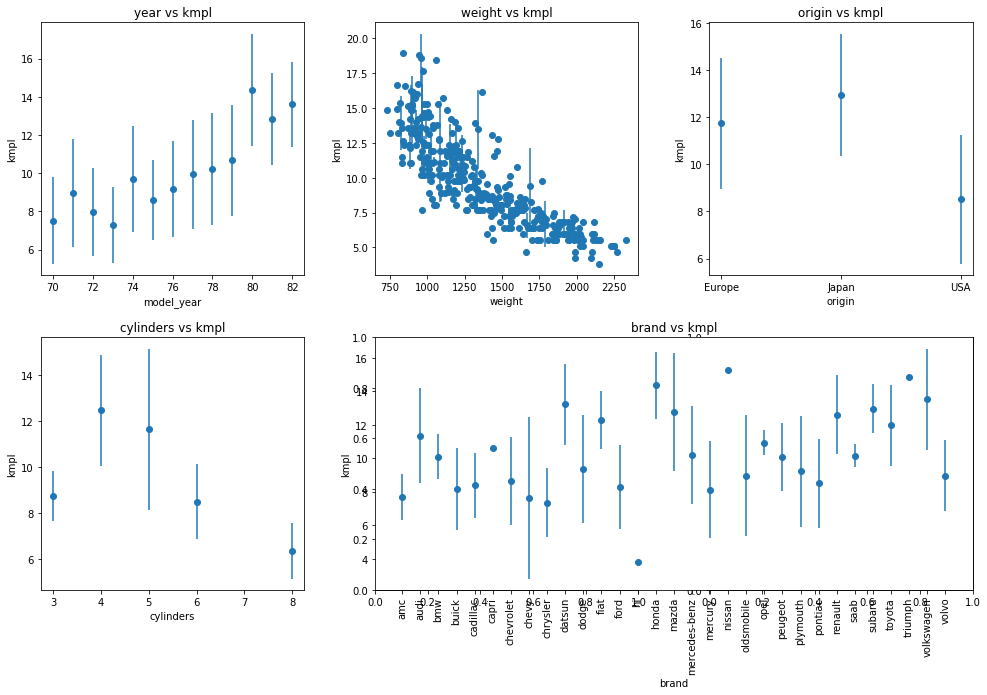

In [65]:
# 2. Construya gráficos de barras del rendimiento (kmpl) promedio en función del año, peso, origen, número 
#    de cilindros y marca (use barras de error con la desviación estándar del rendimiento)
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=False, tight_layout=True, figsize=(14,10))


mean_kmpl_byyear = df.groupby('model_year').mean()['kmpl']
std_kmpl_byyear = df.groupby('model_year').std().fillna(0)['kmpl']
x = mean_kmpl_byyear.index
y = mean_kmpl_byyear.values
yerr = std_kmpl_byyear
ax = axs[0,0]
ax.errorbar(x, y, yerr, fmt='o')
ax.set_title('year vs kmpl')
ax.set_ylabel('kmpl')
ax.set_xlabel('model_year')


mean_kmpl_byweight = df.groupby('weight').mean()['kmpl']
std_kmpl_byweight = df.groupby('weight').std().fillna(0)['kmpl']
x = mean_kmpl_byweight.index
y = mean_kmpl_byweight.values
yerr = std_kmpl_byweight
ax = axs[0,1]
ax.errorbar(x, y, yerr, fmt='o')
ax.set_title('weight vs kmpl')
ax.set_ylabel('kmpl')
ax.set_xlabel('weight')


mean_kmpl_byorigin = df.groupby('origin').mean()['kmpl']
std_kmpl_byorigin = df.groupby('origin').std().fillna(0)['kmpl']
x = mean_kmpl_byorigin.index
y = mean_kmpl_byorigin.values
yerr = std_kmpl_byorigin
ax = axs[0,2]
ax.errorbar(x, y, yerr, fmt='o')
ax.set_title('origin vs kmpl')
ax.set_ylabel('kmpl')
ax.set_xlabel('origin')


mean_kmpl_bycylinders = df.groupby('cylinders').mean()['kmpl']
std_kmpl_bycylinders = df.groupby('cylinders').std().fillna(0)['kmpl']
x = mean_kmpl_bycylinders.index
y = mean_kmpl_bycylinders.values
yerr = std_kmpl_bycylinders
ax = axs[1,0]
ax.errorbar(x, y, yerr, fmt='o')
ax.set_title('cylinders vs kmpl')
ax.set_ylabel('kmpl')
ax.set_xlabel('cylinders')

from matplotlib.gridspec import GridSpec

mean_kmpl_bybrand = df.groupby('brand').mean()['kmpl']
std_kmpl_bybrand = df.groupby('brand').std().fillna(0)['kmpl']
x = mean_kmpl_bybrand.index
y = mean_kmpl_bybrand.values
yerr = std_kmpl_bybrand
gs = GridSpec(2,3,figure=fig)
ax = fig.add_subplot(gs[1,1:])
ax.errorbar(x, y, yerr, fmt='o')
ax.set_title('brand vs kmpl')
ax.set_ylabel('kmpl')
ax.set_xlabel('brand')
plt.xticks(x,x,rotation=90)
plt.subplots_adjust(hspace=2)
plt.show()

### Gráficos interactivos

1. Construya una interfaz gráfica usando `ipywidgets` que permita seleccionar dos atributos y los gráfique como un *scatter plot*
    1. El primer atributo será el eje de abscisas y el segundo atributo el eje de ordenadas
    1. Ese el atributo de origen como el color de los marcadores
1. Los gráficos deben ser legibles, los ejes deben estar etiquetados, use leyenda para los marcadores